## Final Project Submission

Please fill out:
* Student name: Erik Castro
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


# Aproach to the project

I decided to experiment on how Directors impact the total gross of a movie. In order for me to do this I needed to use most of the data from a different dataset called movies.csv. This dataset was added in the files of this project. 
I also needed some of the data from df_budget. However, this data was not in the right format, therefore, I had to make some changes before joining the tables. 
I also had to change indexes to make sure that there were no duplicates in the dataset. Once all this was achieved, I was able to use Data visualitazions to display the data. I used Seaborn as I found it more straight forward. 
Thanks to this EDA I was able to answer my top 3 questions. 
There is also a section at the end of ideas that were scrapped. They might be helpuful later if a more in depth study was needed. 

# Importing libraries needed for the project.  

In [1]:
import pandas as pd 
import sqlite3 as sql 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading datasets

In [2]:
df_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression = 'gzip')
df_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression = 'gzip')
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression = 'gzip')
df_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression = 'gzip')
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep = '\t', compression = 'gzip')
df_movies_extra_info = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression = 'gzip')
df_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression = 'gzip')
df_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression = 'gzip')
df_title_raings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression = 'gzip')
df_movies = pd.read_csv('zippedData/movies.csv')

In [3]:
#df_movies.loc[df_movies['name']== 'Pirates of the Caribbean: On Stranger Tides']
#df_movies.loc[df_movies_total['name'] == 'The Avengers']
#df_movies.sort_values(by=['year'], ascending = False)
df_movies.groupby(['director']).sum().sort_values(by=['gross'], ascending = False )
#df_movie_gross.head()
#df_movie_info.head()

,budget,gross,runtime,score,votes,year
director,,,,,,
Steven Spielberg,1595000000,2890693372,2943,155.1,7209362,42026
Michael Bay,1461000000,2196161642,1758,79.3,3293045,24068
Peter Jackson,1246000000,2134382069,1667,85.6,6173292,22041
James Cameron,742500000,1909926983,916,47.3,3514202,11966
Christopher Nolan,1005006000,1816484940,1215,74.9,9075049,18055
...,...,...,...,...,...,...
Stephen La Rocque,0,1076,96,6.5,330,1991
Ian Fitzgibbon,0,828,88,6.4,5514,2009
Petter Næss,0,547,104,7.2,16609,2012


# Merging two DataFrames together 

I will be merging df_budget together with df_movie_gross. The reason for this is that worldwide_gross column has the domestic and the foreign gross added together, giving the total gross made by the movie.  
I need this numbers as I want to sort out movies depending on the domestic, foreing and worldwide. I also want to group data by director and actor in primary role.  


The first three lines of code are my experiments to see what is going on with the data. 

In [4]:
df_budget.loc[df_budget['movie'] == 'Toy Story 3']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
46,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [5]:
df_movies.loc[df_movies['name'] == 'Toy Story 3']

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5309,200000000,Walt Disney Pictures,USA,Lee Unkrich,Animation,415004880,Toy Story 3,G,18/06/2010,103,8.3,Tom Hanks,603472,John Lasseter,2010


In [6]:
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


I will be handling empty data in the datasets. I'm using a different dataset from a website, however it hasnt been updated in 2 years hence some data will be missing.
the datasets I will be working on are the following: 
- df_movie_gross
- df_budget

In [7]:
df_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
df_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

I will link df_movie_gross and df_budget and create df_movie_details through title/movie
I need to change the column name to title in the movie_gross dataframe. Once this is done I need to change the index to be the movie name. 

In [9]:
df_movie_gross = df_movie_gross.rename(columns={'title':'movie'})
df_movie_gross

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
#df_movie_gross.set_index('movie', inplace = True) this step was cancelled as I was not able to read the data properly 

In [11]:
df_movie_gross

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


I can now choose which columns I want int my dataset. I will be discarding studio and year, as both already appear in my other dataset. 

In [12]:
df_movie_gross = df_movie_gross[['movie','domestic_gross','foreign_gross']]

In [13]:
df_movie_gross

,movie,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3382,The Quake,6200.0,NaN
3383,Edward II (2018 re-release),4800.0,NaN
3384,El Pacto,2500.0,NaN
3385,The Swan,2400.0,NaN


Now the same process needs to be repeated for df_budget. However, df_budget has a problem as domestic_gross, production_budget, worldwide_gross are strings, therefore I have to eliminate the dollar signs and the commas to be able to transform them into int or float.  
I decided to use a lambda function for this. Once this is done I can move to do the following:
- making movie column the index 
- choosing the columns I'll need and creating a new dataset

In [14]:
def replace_word(df_name,column_name):
    """ 
    Replaces words from df_name using the column_name
  
    Replaces '$' and ',' from the column_name given the df_name into ''
  
    Parameters: 
    df_name (DataFrame): the DataFrame that will be used to get column_name
    column_name (str): The column name that will be used to make changes 
    """
  
    df_name[column_name] = [df_name[column_name].iloc[i].replace(",","") for i in df_name[column_name].index]
    df_name[column_name] = [df_name[column_name].iloc[i].replace("$","") for i in df_name[column_name].index]

In [15]:
replace_word(df_budget,'production_budget')
replace_word(df_budget,'domestic_gross')
replace_word(df_budget,'worldwide_gross')
df_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [16]:
df_budget = df_budget[['movie','production_budget','domestic_gross','worldwide_gross']]

In [17]:
df_budget

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
5777,Red 11,7000,0,0
5778,Following,6000,48482,240495
5779,Return to the Land of Wonders,5000,1338,1338
5780,A Plague So Pleasant,1400,0,0


In [18]:
df_budget.dtypes

movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [19]:
df_budget['production_budget'] = pd.to_numeric(df_budget['production_budget'], errors ='coerce')
df_budget['domestic_gross'] = pd.to_numeric(df_budget['domestic_gross'], errors ='coerce')
df_budget['worldwide_gross'] = pd.to_numeric(df_budget['worldwide_gross'], errors ='coerce')

df_budget.dtypes

movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [20]:
df_budget.isna().sum()

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
df_budget.sort_values(by=['worldwide_gross'], ascending = False)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
42,Titanic,200000000,659363944,2208208395
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,Avengers: Infinity War,300000000,678815482,2048134200
33,Jurassic World,215000000,652270625,1648854864
...,...,...,...,...
5474,Insomnia Manica,500000,0,0
5473,Girls Gone Dead,500000,0,0
5472,Enter Nowhere,500000,0,0
5471,Drones,500000,0,0


In this section, I'm checking the data in more depth before joining the dataframes. This will help me decide if this data is good enough. 

In [22]:
df_movie_gross.sort_values(by=['domestic_gross'], ascending = False)

,movie,domestic_gross,foreign_gross
1872,Star Wars: The Force Awakens,936700000.0,"1,131.6"
3080,Black Panther,700100000.0,646900000
3079,Avengers: Infinity War,678800000.0,"1,369.5"
1873,Jurassic World,652300000.0,"1,019.4"
727,Marvel's The Avengers,623400000.0,895500000
...,...,...,...
1975,Surprise - Journey To The West,NaN,49600000
2392,Finding Mr. Right 2,NaN,114700000
2468,Solace,NaN,22400000
2595,Viral,NaN,552000


In [23]:
df_budget.sort_values(by=['worldwide_gross'], ascending = False)

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
42,Titanic,200000000,659363944,2208208395
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,Avengers: Infinity War,300000000,678815482,2048134200
33,Jurassic World,215000000,652270625,1648854864
...,...,...,...,...
5474,Insomnia Manica,500000,0,0
5473,Girls Gone Dead,500000,0,0
5472,Enter Nowhere,500000,0,0
5471,Drones,500000,0,0


# Changes

After furthering inspecting the dataset I can see that is missing some important information, for example the movie Titanic and Avatar are not showing, hence I consider this data as incomplete. 
I decided to create a new column, foregin_gross, in the budget dataset. Using the worldwide_gross minus the domestic_gross. I also decided not to change the index as it gives me some problems when sorting the values in ascending or descending order. 

Creating Foreign_gross column 

In [24]:
df_budget.index

RangeIndex(start=0, stop=5782, step=1)

In [25]:
df_budget.loc[df_budget.index, 'foreign_gross'] = df_budget.loc[df_budget.index, 'worldwide_gross']- df_budget.loc[df_budget.index, 'domestic_gross']

In [26]:

df_budget

,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,Avatar,425000000,760507625,2776345279,2015837654
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,Dark Phoenix,350000000,42762350,149762350,107000000
3,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
...,...,...,...,...,...
5777,Red 11,7000,0,0,0
5778,Following,6000,48482,240495,192013
5779,Return to the Land of Wonders,5000,1338,1338,0
5780,A Plague So Pleasant,1400,0,0,0


In [27]:
df_movies = df_movies.rename(columns={'name':'movie'})
df_movies

,budget,company,country,director,genre,gross,movie,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22/08/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11/06/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16/05/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18/07/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01/08/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,22/07/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,06/05/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,25/07/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,02/12/2016,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


Setting movie as the index

In [28]:
df_budget.set_index('movie', inplace = True)

In [29]:
df_movies.set_index('movie', inplace = True)

Merging both dataframes together using an Inner join with movie as the index

In [30]:
df_movie_budget = df_movies.join(df_budget, how = 'inner')


In [31]:
#run this only once!!
df_movie_budget = df_movie_budget.reset_index()

In [32]:
df_movie_budget.sort_values(by=['worldwide_gross'], ascending = False)

,movie,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year,production_budget,domestic_gross,worldwide_gross,foreign_gross
247,Avatar,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,PG-13,18/12/2009,162,7.8,Sam Worthington,954412,James Cameron,2009,425000000,760507625,2776345279,2015837654
3074,Titanic,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,PG-13,19/12/1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,200000000,659363944,2208208395,1548844451
1311,Jurassic World,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,PG-13,12/06/2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,215000000,652270625,1648854864,996584239
939,Furious 7,190000000,Universal Pictures,USA,James Wan,Action,353007020,PG-13,03/04/2015,137,7.2,Vin Diesel,309837,Chris Morgan,2015,190000000,353007020,1518722794,1165715774
2392,The Avengers,60000000,Warner Bros.,USA,Jeremiah S. Chechik,Action,23322832,PG-13,14/08/1998,89,3.7,Ralph Fiennes,36811,Sydney Newman,1998,225000000,623279547,1517935897,894656350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Crossroads,0,Columbia Pictures Corporation,USA,Walter Hill,Drama,5839031,R,14/03/1986,99,7.1,Ralph Macchio,11415,John Fusco,1986,500000,0,0,0
598,Crossroads,12000000,Fuzzy Bunny Films (I),USA,Tamra Davis,Comedy,37191304,PG-13,15/02/2002,93,3.4,Britney Spears,35300,Shonda Rhimes,2002,500000,0,0,0
133,Alice in Wonderland,200000000,Walt Disney Pictures,USA,Tim Burton,Adventure,334191110,PG,05/03/2010,108,6.5,Mia Wasikowska,331389,Linda Woolverton,2010,3000000,0,0,0
2997,The Toxic Avenger Part II,2300000,Lorimar Film Entertainment,USA,Michael Herz,Action,792966,R,24/02/1989,102,5.1,Ron Fazio,5067,Lloyd Kaufman,1989,2300000,0,0,0


# Data Visualizations 

# Will it be there an advantage if a high grossing director is selected?

## Top 25 high grossing directors worldwide and domestic

My first visualization will show top 20 highest-earning movie Directors of the time of the dataset, ranked by total box office gross

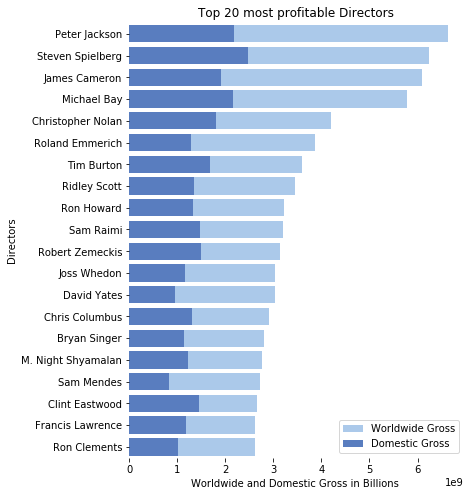

In [33]:
#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))


#create the dataframe to be used and reseting the index. 
df_directors_vis = df_movie_budget.groupby(['director']).sum().sort_values(by=['worldwide_gross'], ascending = False).head(20).reset_index()

#setting the color of the worldwide gross data
sns.set_color_codes('pastel')

#plotting the worldwide_gross data
sns.barplot(x='worldwide_gross', y='director', data = df_directors_vis, label= 'Worldwide Gross', color ='b')

#setting a different colour for the new data to be inputted
sns.set_color_codes("muted")

#plotting the Domestic_gross data
sns.barplot(x='domestic_gross', y='director', data = df_directors_vis, label= 'Domestic Gross', color ='b')

#Adding a legend at the lower right in one column
ax.legend(ncol=1, loc="lower right", frameon=True)

#informative Axis, the y label and the x label. 
ax.set( ylabel="Directors",
       xlabel="Worldwide and Domestic Gross in Billions ")

#Setting a title
ax.set_title('Top 20 most profitable Directors')

#making the left and the bottom line dissapear, making it look more professional
sns.despine(left = True, bottom = True)

## Most profitable directors genre

This will also help in making a decision in what kind of movies is best to start as there are a lot of options in the market. 

Text(0.5, 1.0, 'Top 20 highest grossing directors genre')

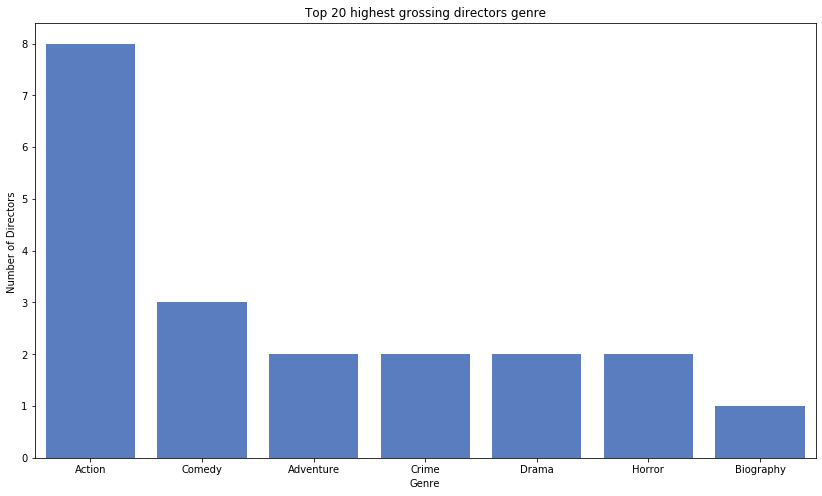

In [34]:
#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 8))

#Loading data base
df_genre_vis = df_movie_budget.head(20).groupby(['genre']).count().sort_values(by=['worldwide_gross'], ascending = False).reset_index()

#Loading barplot using seaborn
sns.barplot(x='genre', y='director', data = df_genre_vis, label= 'Directors', color ='b')

#informative Axis, the y label and the x label. 
ax.set( ylabel="Number of Directors ",
        xlabel="Genre")

#Setting a title
ax.set_title('Top 20 highest grossing directors genre')

## Top highest grossing movie genres
In this visualization I'm looking at the highest grossing movies genres.

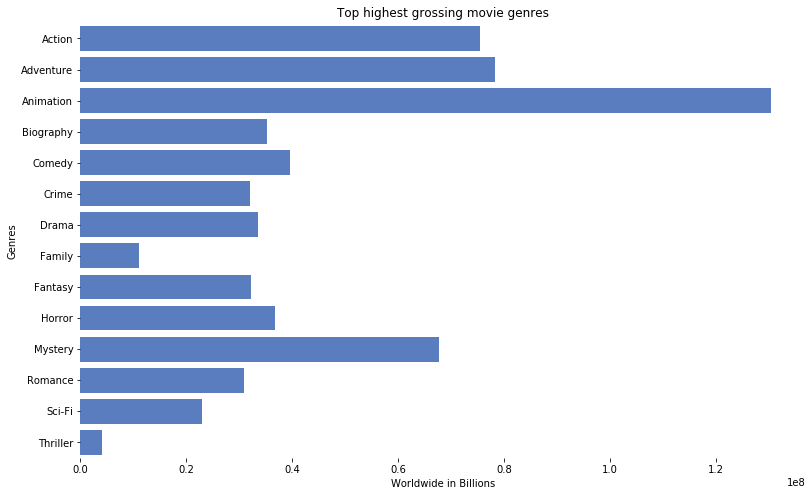

In [35]:
#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8))

#create the dataframe to be used
df_genre_vis = df_movie_budget.groupby(['genre']).mean().reset_index()
#plotting the data
sns.barplot( x = 'gross' , y='genre',data = df_genre_vis.reset_index(),color = 'b')

#Adding a legend at the lower right in one column
#ax.legend(ncol=2, loc="upper right", frameon=False, title = 'Genre Categories')

#informative Axis, the y label and the x label. 
ax.set( ylabel='Genres',
        xlabel='Worldwide in Billions')
ax.set_title('Top highest grossing movie genres')
#making the left and the bottom line dissapear, making it look more professional
sns.despine(left = True, bottom = True)

## Answer

Answering the initital question, it seems that chossing the right director is essential but this also depends of what movie genre you choose. Top directors tend to choose action, comedy and adventure movies. This means that genre is as important as a director. Putting everything together, making the right choice of director and genre, then the potential profits look higher. 

# Will having a small production budget have an impact on potential profit? 

## Linear correlation between worldwide gross and produciton budget

Text(0.5, 1.0, 'Correlation between Worldwide gross and Production budget')

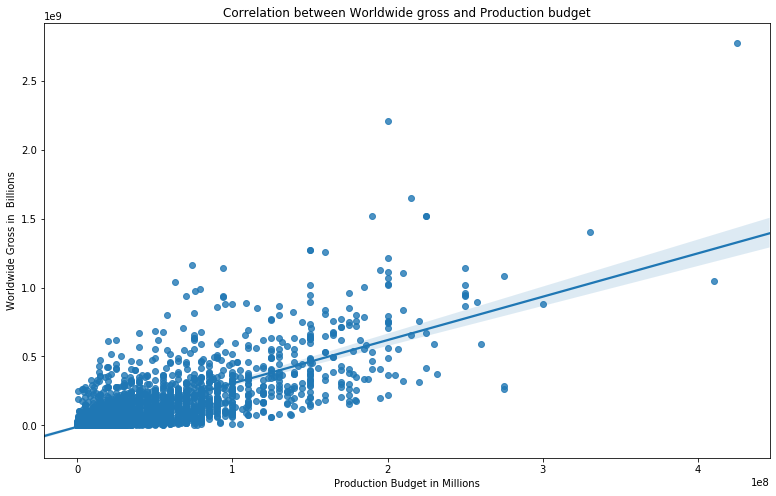

In [36]:
#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8))

#plotting the data
#g = sns.catplot('year','worldwide_gross', col = 'rating', col_wrap = 2,data = df_rating_vis,kind ='point', height =5 ,aspect = 5)
ax = sns.regplot(x='production_budget', y='worldwide_gross', data = df_movie_budget)

#informative Axis, the y label and the x label. 
ax.set( ylabel="Worldwide Gross in  Billions",
       xlabel="Production Budget in Millions")
#Setting title
ax.set_title('Correlation between Worldwide gross and Production budget')

### Worldwide_gross v production budget correlation value

In [37]:

df_worldwide_production_corr = df_movie_budget[['production_budget','worldwide_gross']].head(25)
df_worldwide_production_corr.corr()


,production_budget,worldwide_gross
production_budget,1.000000,0.859045
worldwide_gross,0.859045,1.000000


## Answer

There seems to be a positive correlation between production budget and total worldwide gross. This means as the production budget is increased the potential worldwide profit. 

# What is the best runtime for a movie?  will this have an effect on profits?

## Top 25 most profitable movies run time mean to find out a good lenght of a movie 

## Average boxplot

Text(0.5, 1.0, 'Average top 25 highest grossing movies runtime')

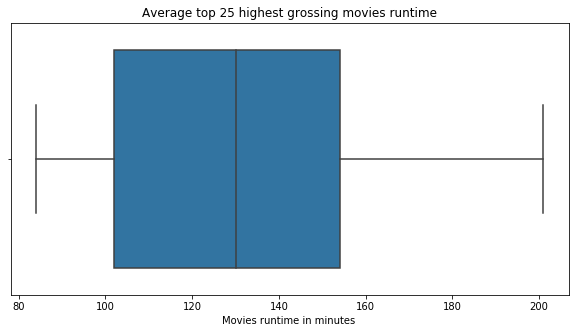

In [38]:
#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

#creating the dataframe
df_runtime = df_movie_budget.sort_values(by=['worldwide_gross'], ascending = False).head(25)
#plotting the data into the graph
sns.boxplot(x=df_runtime['runtime'])

#informative Axis, the y label and the x label. 
ax.set(xlabel="Movies runtime in minutes ")

#Setting title
ax.set_title('Average top 25 highest grossing movies runtime')


##  Linear correlation runtime and worldwide gross

Text(0.5, 1.0, 'Runtime and Worldwide gross correlation')

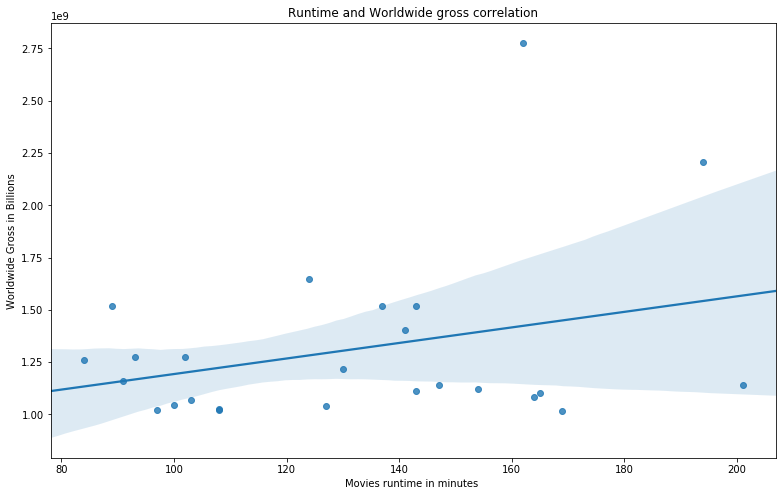

In [39]:
#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8))

#plotting the data
#g = sns.catplot('year','worldwide_gross', col = 'rating', col_wrap = 2,data = df_rating_vis,kind ='point', height =5 ,aspect = 5)
ax = sns.regplot(x='runtime', y='worldwide_gross', data = df_runtime)

#informative Axis, the y label and the x label. 
ax.set( ylabel="Worldwide Gross in Billions",
       xlabel="Movies runtime in minutes ")

#Setting title
ax.set_title('Runtime and Worldwide gross correlation')

## Runtime and worldwide gross correlation value

In [40]:
df_runtime_gross = df_movie_budget[['runtime','worldwide_gross']]
#0.171859
df_runtime_gross.corr()

,runtime,worldwide_gross
runtime,1.000000,0.252034
worldwide_gross,0.252034,1.000000


# Answer

Checking the average minutes of the top 25 grossing movies I can evaluate that most movies run from 110 to 150 minutes. 
I wanted to see if there is some kind of correlation between the run time and the total gross. It seems that there is, however, is very small. The way to look at this, the close to 0 the less correlation it has. Therefore, the correlation looks more neutral than anything else. 
To summarize: 
- best runtime for a movie between: 110 and 150 minutes
- Almost neutral correlation between runtime and total gross


# Averages

### First 25 genre averages by worldwide_gross

In [41]:
df_movie_budget.head(25).groupby(['genre']).count().sort_values(by=['worldwide_gross'], ascending = False).reset_index()

,genre,movie,budget,company,country,director,gross,rating,released,runtime,score,star,votes,writer,year,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,Action,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1,Comedy,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,Drama,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,Adventure,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Crime,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,Horror,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,Biography,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Averages of all data in the dataset

In [42]:
df_movie_budget.mean().reset_index()

,index,0
0,budget,4.018643e+07
1,gross,5.368913e+07
2,runtime,1.086401e+02
3,score,6.434350e+00
4,votes,1.149007e+05
5,year,2.004442e+03
6,production_budget,4.051734e+07
7,domestic_gross,5.397793e+07
8,worldwide_gross,1.165858e+08
9,foreign_gross,6.260790e+07


### Average in top 25 data

This is used in Runtime analysis

In [43]:
df_movie_budget.sort_values(by=['worldwide_gross'], ascending = False).head(25).mean()

budget               1.679200e+08
gross                3.821881e+08
runtime              1.310400e+02
score                7.284000e+00
votes                5.308072e+05
year                 2.009560e+03
production_budget    2.096880e+08
domestic_gross       4.333615e+08
worldwide_gross      1.308466e+09
foreign_gross        8.751045e+08
dtype: float64

# Unfinished ideas

## Actors Available per genre
this is another example of a graph that didnt make it to the power point

Text(0.5, 1.0, 'Actors available per genre')

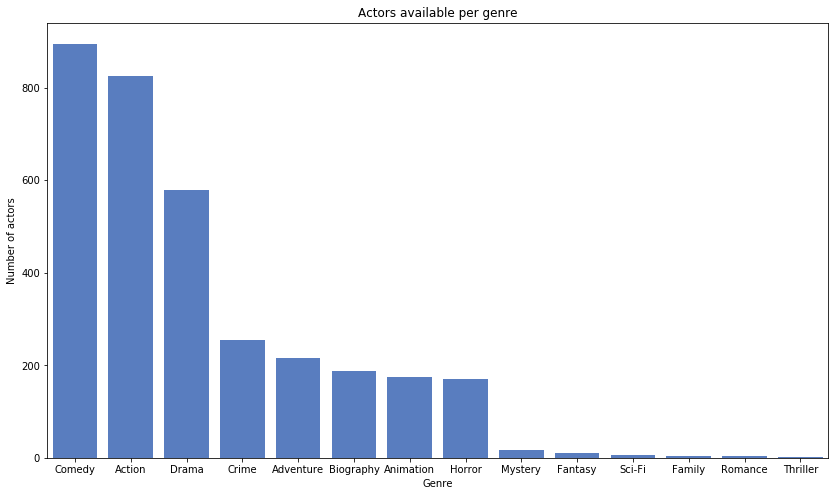

In [44]:
f, ax = plt.subplots(figsize=(14, 8))
df_genre_vis = df_genre_vis = df_movie_budget.groupby(['genre']).count().sort_values(by=['star'], ascending = False).reset_index()
sns.barplot(x='genre', y='star', data = df_genre_vis, label= 'Stars', color ='b')

#informative Axis, the y label and the x label. 
ax.set( ylabel="Number of actors",
        xlabel="Genre")

#Setting a title
ax.set_title('Actors available per genre')


## Rating/ year relationship 
In this case I am exploring the relationship between rating, year and worldwide grossing. 

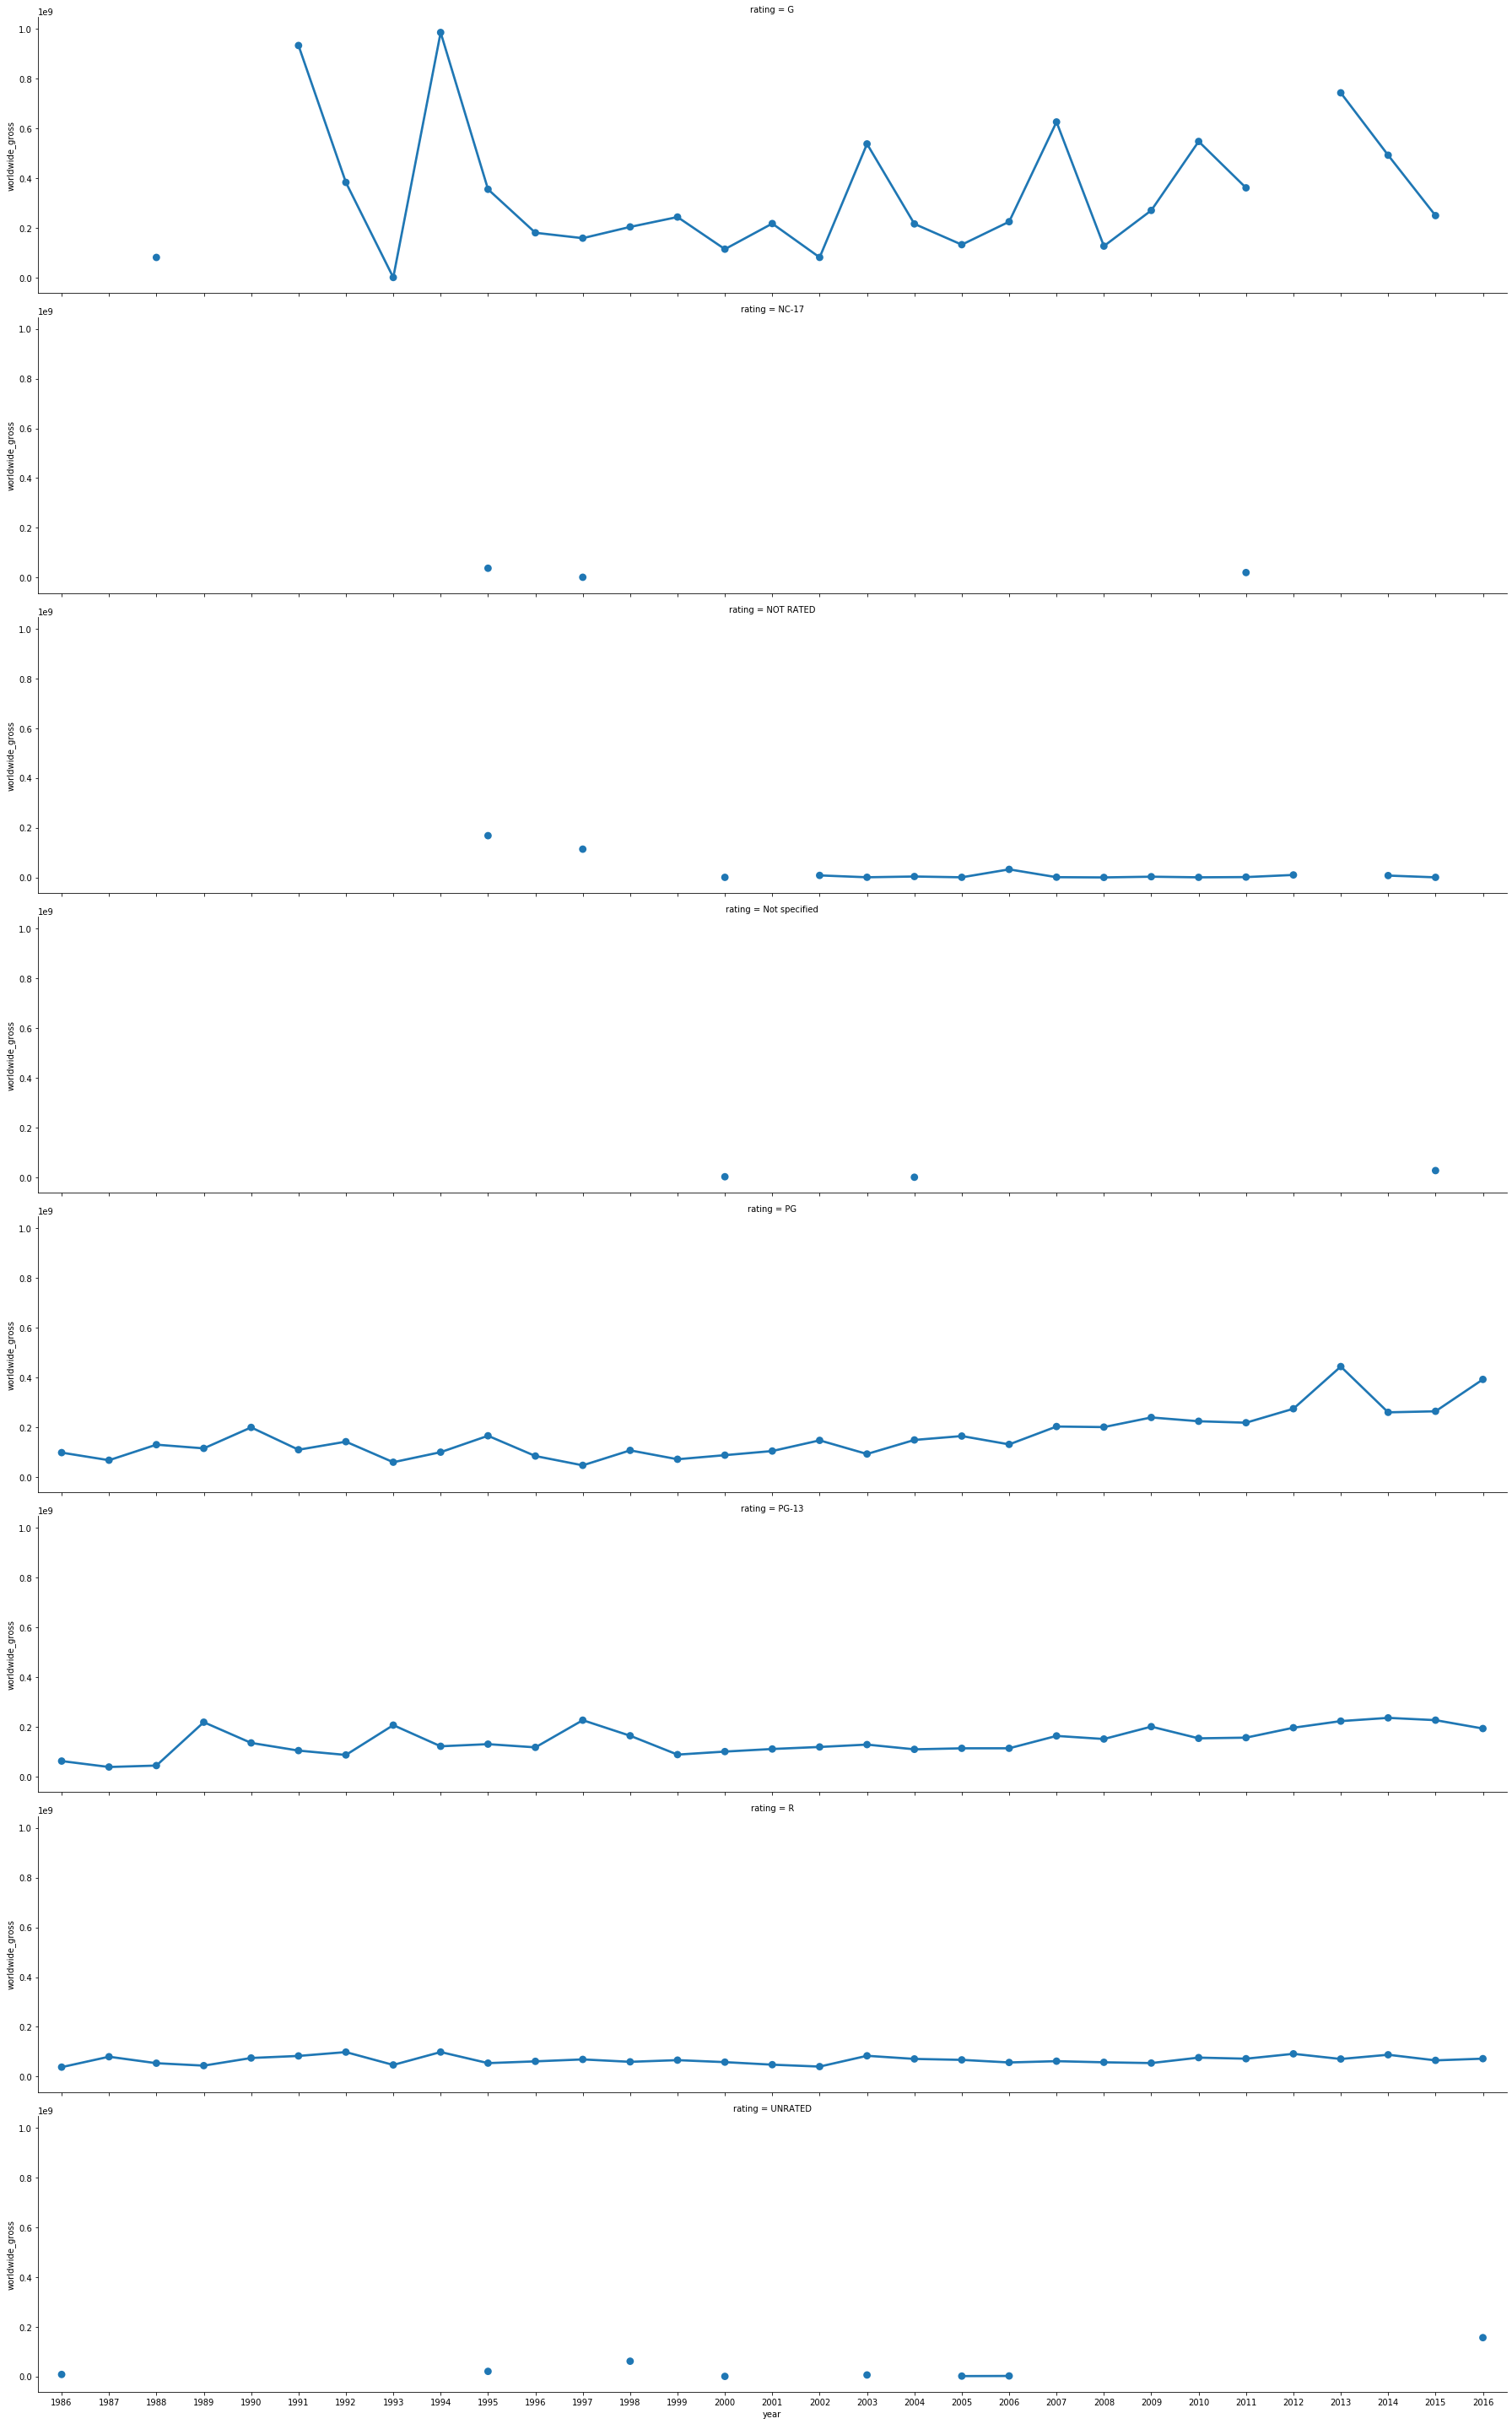

In [45]:

#initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(13, 8))

#create the dataframe to be used
df_rating_vis = df_movie_budget.groupby(['rating','year']).mean().reset_index()
#plotting the da
g = sns.catplot('year','worldwide_gross', col = 'rating', col_wrap = 1,data = df_rating_vis,kind ='point', height =5 ,aspect = 5)



## Worldwide gross v year correlation. 

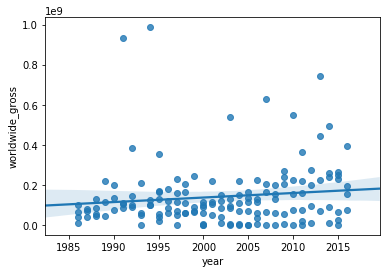

In [46]:
#create the dataframe to be used
#f_rating_vis = df_movie_budget.groupby(['rating']).mean().reset_index()
#plotting the data
#g = sns.catplot('year','worldwide_gross', col = 'rating', col_wrap = 2,data = df_rating_vis,kind ='point', height =5 ,aspect = 5)
ax = sns.regplot(x='year', y='worldwide_gross', data = df_rating_vis)